In [1]:
import pandas as pd
import datetime as dt

In [119]:
train_df = pd.read_csv('train_aox2Jxw/train.csv')

In [120]:
test_df = pd.read_csv('test_bqCt9Pv.csv')

In [121]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [122]:
test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [123]:
train_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

### Feature correlation

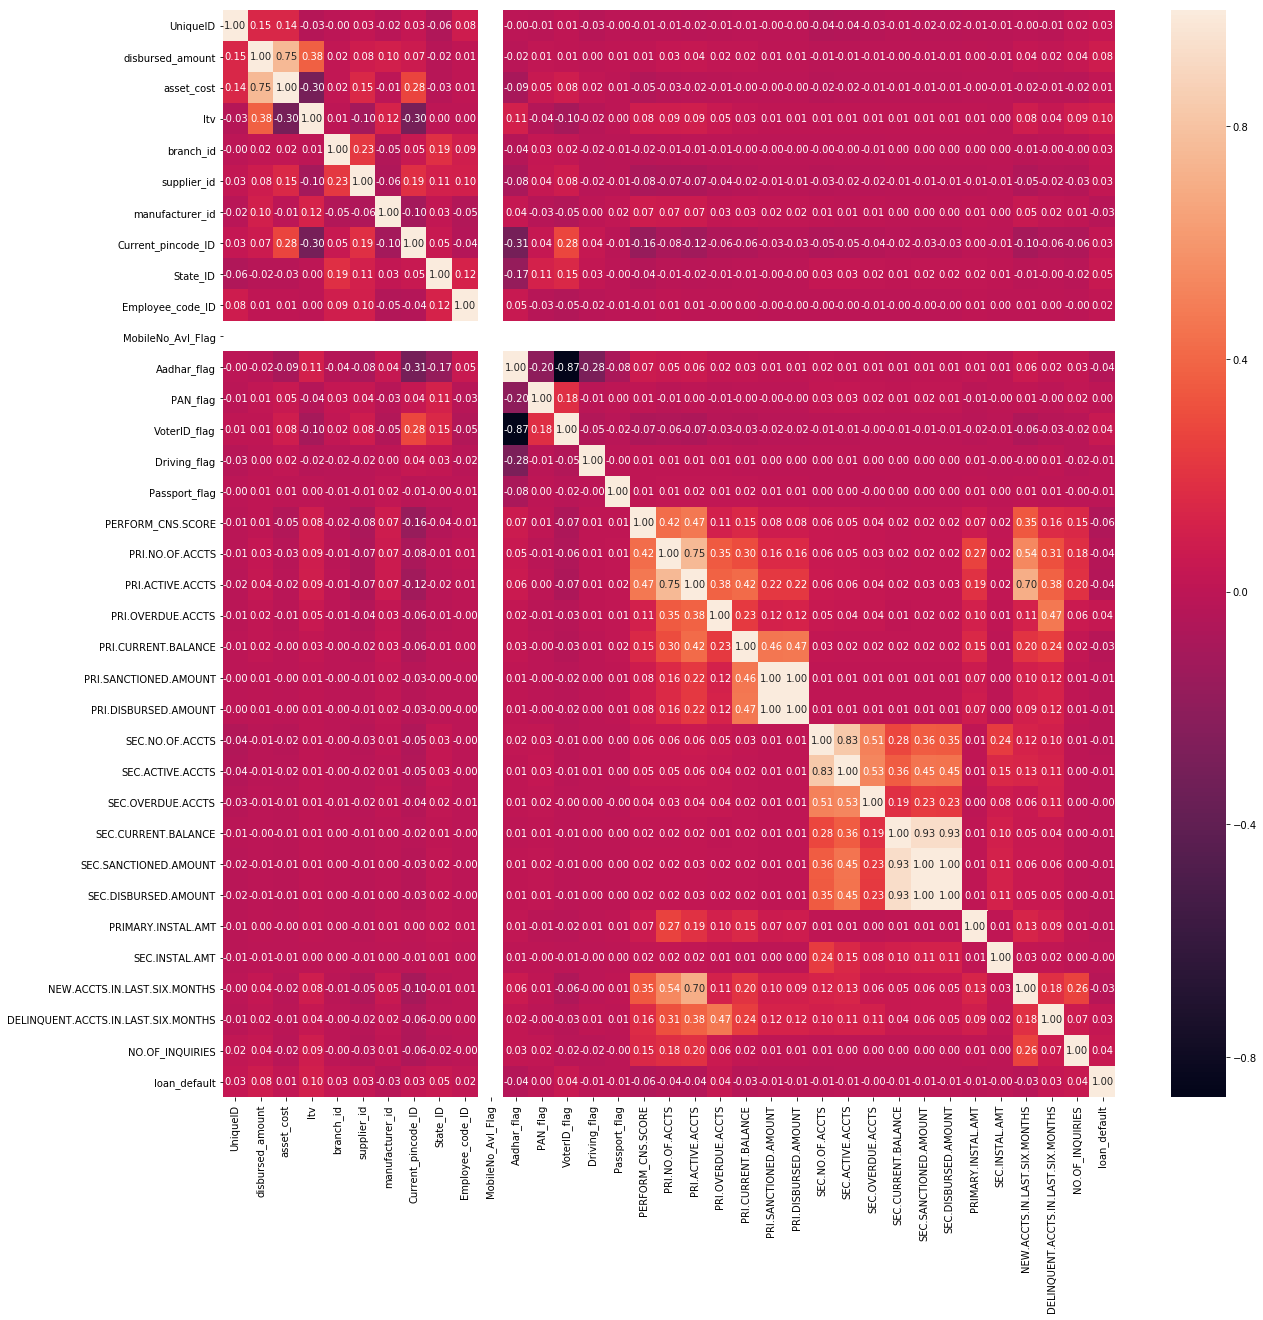

In [124]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

plt.show()

In [125]:
# train_df.isna().sum()

### Combine below features and remove

In [126]:
# test_df.isna().sum()
train_df[['SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']].corr()

,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT
SEC.SANCTIONED.AMOUNT,1.000000,0.999646
SEC.DISBURSED.AMOUNT,0.999646,1.000000


In [127]:
train_df['Secondary_amount'] = train_df['SEC.SANCTIONED.AMOUNT'] + train_df['SEC.DISBURSED.AMOUNT']
test_df['Secondary_amount'] = test_df['SEC.SANCTIONED.AMOUNT'] + test_df['SEC.DISBURSED.AMOUNT']

In [128]:
train_df = train_df.drop(['SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT'], axis=1)
test_df = test_df.drop(['SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT'], axis=1)

## Find target variable where sec.instal.amt is more

In [129]:
train_df[train_df['SEC.INSTAL.AMT']>train_df['PRIMARY.INSTAL.AMT']].groupby('loan_default')['loan_default'].count()

loan_default
0    1237
1     293
Name: loan_default, dtype: int64

In [130]:
train_df[train_df['SEC.INSTAL.AMT']<train_df['PRIMARY.INSTAL.AMT']].groupby('loan_default')['loan_default'].count()

loan_default
0    57450
1    15618
Name: loan_default, dtype: int64

In [131]:
def is_more(a,b):
    if a>b:
        return 1
    return 0

In [132]:
train_df['sec_greater']=train_df.apply(lambda x: is_more(x['SEC.INSTAL.AMT'], x['PRIMARY.INSTAL.AMT']), axis=1)

In [133]:
test_df['sec_greater']=test_df.apply(lambda x: is_more(x['SEC.INSTAL.AMT'], x['PRIMARY.INSTAL.AMT']), axis=1)

In [134]:
train_df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [135]:
test_df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [136]:
set(train_df['UniqueID']).intersection(test_df['UniqueID'])

set()

In [137]:
set(test_df['branch_id'])-set(train_df['branch_id'])

set()

In [138]:
set(test_df['manufacturer_id'])-set(train_df['manufacturer_id'])

{155}

### Handling of date columns

In [139]:
train_df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'])
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'])

In [140]:
train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'])
test_df['DisbursalDate'] = pd.to_datetime(test_df['DisbursalDate'])

In [141]:
# NOW=dt.datetime(2017,12,6)
NOW=dt.datetime(2019,3,1)

In [142]:
train_df['Date.of.Birth'] = abs(train_df['Date.of.Birth']-NOW).dt.days//365

In [143]:
test_df['Date.of.Birth'] = abs(test_df['Date.of.Birth']-NOW).dt.days//365

In [144]:
train_df['DisbursalDate'] = abs(train_df['DisbursalDate']-NOW)
test_df['DisbursalDate'] = abs(test_df['DisbursalDate']-NOW)

In [145]:
train_df['DisbursalDate'] = train_df['DisbursalDate'].dt.days 
test_df['DisbursalDate'] = test_df['DisbursalDate'].dt.days 

In [146]:
def con(xx):
    #  convert date month to int
    xx = xx.split()
    yr = xx[0].replace('yrs','')
    
    mn = xx[1].replace('mon','')
    return int(yr)*365+int(mn)*30

In [147]:
train_df['AVERAGE.ACCT.AGE'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: con(x))
train_df['CREDIT.HISTORY.LENGTH'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: con(x))

In [148]:
test_df['AVERAGE.ACCT.AGE'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: con(x))
test_df['CREDIT.HISTORY.LENGTH'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: con(x))

In [149]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

### Remove highly collinear features

In [150]:
train_df['combined_flag'] = train_df['MobileNo_Avl_Flag']+train_df['Aadhar_flag']+train_df['PAN_flag']+train_df['VoterID_flag']+train_df['Driving_flag']+train_df['Passport_flag']
test_df['combined_flag'] = test_df['MobileNo_Avl_Flag']+test_df['Aadhar_flag']+test_df['PAN_flag']+test_df['VoterID_flag']+test_df['Driving_flag']+test_df['Passport_flag']

In [151]:
train_df = train_df.drop(['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], axis=1)
test_df = test_df.drop(['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], axis=1)

In [152]:
y = train_df.loan_default
X = train_df.drop(['UniqueID','loan_default'], axis=1)
test = test_df.drop(['UniqueID'], axis=1)

## Split 80-20

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Categorical features

In [154]:
cat_features = ['branch_id', 'supplier_id', 'manufacturer_id', 'State_ID', 'Employee_code_ID', 'Current_pincode_ID','Employment.Type', 'sec_greater','PERFORM_CNS.SCORE.DESCRIPTION']

### Class imbalance ratio

In [155]:
train_df.shape

(233154, 36)

In [156]:
train_df.groupby(['loan_default'])['loan_default'].sum()

loan_default
0        0
1    50611
Name: loan_default, dtype: int64

In [157]:
class_imbalance_ratio = (233154-50611)/50611

In [158]:
class_imbalance_ratio

3.606785086246073

## Catboost classifier

In [56]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    loss_function='Logloss',
    custom_loss=['AUC'],
    use_best_model=True,
    task_type='GPU',
    early_stopping_rounds=50,
#     class_weights = [1, 2.3]
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.6546115	test: 0.6538001	best: 0.6538001 (0)	total: 99.2ms	remaining: 1m 39s
1:	learn: 0.6240580	test: 0.6225963	best: 0.6225963 (1)	total: 218ms	remaining: 1m 48s
2:	learn: 0.5999731	test: 0.5977107	best: 0.5977107 (2)	total: 305ms	remaining: 1m 41s
3:	learn: 0.5807041	test: 0.5778961	best: 0.5778961 (3)	total: 412ms	remaining: 1m 42s
4:	learn: 0.5649042	test: 0.5618491	best: 0.5618491 (4)	total: 497ms	remaining: 1m 38s
5:	learn: 0.5525236	test: 0.5494617	best: 0.5494617 (5)	total: 604ms	remaining: 1m 40s
6:	learn: 0.5426011	test: 0.5396511	best: 0.5396511 (6)	total: 727ms	remaining: 1m 43s
7:	learn: 0.5346392	test: 0.5319067	best: 0.5319067 (7)	total: 843ms	remaining: 1m 44s
8:	learn: 0.5281695	test: 0.5254695	best: 0.5254695 (8)	total: 960ms	remaining: 1m 45s
9:	learn: 0.5228627	test: 0.5199059	best: 0.5199059 (9)	total: 1.06s	remaining: 1m 44s
10:	learn: 0.5185068	test: 0.5155493	best: 0.5155493 (10)	total: 1.16s	remaining: 1m 44s
11:	learn: 0.5149107	test: 0.5120178	bes

In [91]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics
from catboost import *

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
# roc_auc = sklearn.metrics.auc(fpr, tpr)

In [77]:
# roc_auc

In [105]:
model.predict_proba(test)

array([[0.51401193, 0.48598807],
       [0.43849535, 0.56150465],
       [0.48242708, 0.51757292],
       ...,
       [0.5934094 , 0.4065906 ],
       [0.43639886, 0.56360114],
       [0.70887388, 0.29112612]])

In [102]:
xx[:,1] 

array([0.37767108, 0.50863604, 0.33383752, ..., 0.21721504, 0.42498124,
       0.46445283])

In [57]:
submission = pd.DataFrame()
submission['UniqueID'] = test_df.UniqueID
submission['loan_default'] = list(model.predict_proba(test)[:,1])
submission.to_csv('submission_early_stopping_16_4.csv', index=False)

In [62]:
# model.get_feature_importance?

### Light GBM

In [58]:
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}

### Convert string to int label encoder

In [159]:
dd = list(train_df['Employment.Type'].unique())
emp = dict(zip(dd, [i for i in range(len(dd))]))
X_train['Employment.Type'] = X_train['Employment.Type'].apply(lambda x: emp[x])
X_validation['Employment.Type'] = X_validation['Employment.Type'].apply(lambda x: emp[x])

C:\Users\Aditya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aditya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [160]:
test['Employment.Type'] = test['Employment.Type'].apply(lambda x: emp[x])

In [161]:
cns = list(train_df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())
cns_score = dict(zip(cns, [i for i in range(len(cns))]))
X_train['PERFORM_CNS.SCORE.DESCRIPTION'] = X_train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: cns_score[x])
X_validation['PERFORM_CNS.SCORE.DESCRIPTION'] = X_validation['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: cns_score[x])
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: cns_score[x])

C:\Users\Aditya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aditya\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [102]:
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 40, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_validation, y_validation)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 20)


C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l2: 0.16861	valid_0's auc: 0.6221	valid_0's binary_logloss: 0.51942
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.167669	valid_0's auc: 0.631329	valid_0's binary_logloss: 0.51668
[3]	valid_0's l2: 0.166932	valid_0's auc: 0.632601	valid_0's binary_logloss: 0.514527
[4]	valid_0's l2: 0.166228	valid_0's auc: 0.63526	valid_0's binary_logloss: 0.512477
[5]	valid_0's l2: 0.165659	valid_0's auc: 0.637395	valid_0's binary_logloss: 0.510797
[6]	valid_0's l2: 0.165216	valid_0's auc: 0.638217	valid_0's binary_logloss: 0.509486
[7]	valid_0's l2: 0.164756	valid_0's auc: 0.640403	valid_0's binary_logloss: 0.508131
[8]	valid_0's l2: 0.164424	valid_0's auc: 0.641454	valid_0's binary_logloss: 0.507135
[9]	valid_0's l2: 0.16408	valid_0's auc: 0.643268	valid_0's binary_logloss: 0.506103
[10]	valid_0's l2: 0.16383	valid_0's auc: 0.643923	valid_0's binary_logloss: 0.50534
[11]	valid_0's l2: 0.16355	valid_0's auc: 0.644961	valid_0's binary_logloss: 0.504492


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l2', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
gridsearch.best_params_

{'learning_rate': 0.2, 'n_estimators': 30}

In [105]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l2', 
                        n_estimators = 30)


gbm.fit(X_train, y_train,
        eval_set=[(X_validation, y_validation)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=20)

[1]	valid_0's l2: 0.167658	valid_0's auc: 0.622251	valid_0's binary_logloss: 0.516656
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.166174	valid_0's auc: 0.631867	valid_0's binary_logloss: 0.512335
[3]	valid_0's l2: 0.165168	valid_0's auc: 0.637055	valid_0's binary_logloss: 0.509353
[4]	valid_0's l2: 0.164478	valid_0's auc: 0.638729	valid_0's binary_logloss: 0.507303
[5]	valid_0's l2: 0.1639	valid_0's auc: 0.641086	valid_0's binary_logloss: 0.505545
[6]	valid_0's l2: 0.163375	valid_0's auc: 0.644002	valid_0's binary_logloss: 0.503968
[7]	valid_0's l2: 0.162825	valid_0's auc: 0.647373	valid_0's binary_logloss: 0.502367
[8]	valid_0's l2: 0.162438	valid_0's auc: 0.650438	valid_0's binary_logloss: 0.501212
[9]	valid_0's l2: 0.162129	valid_0's auc: 0.651977	valid_0's binary_logloss: 0.500288
[10]	valid_0's l2: 0.161878	valid_0's auc: 0.6533	valid_0's binary_logloss: 0.499502
[11]	valid_0's l2: 0.161546	valid_0's auc: 0.655221	valid_0's binary_logloss: 0.4

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l2', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=30, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

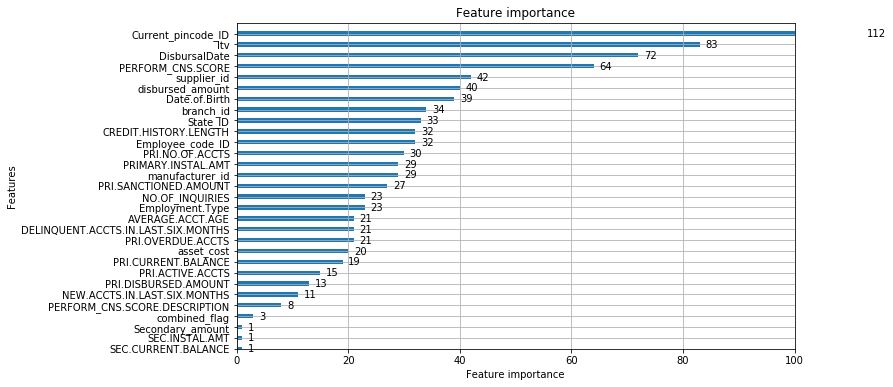

In [108]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 30, 
                         xlim = (0,100), ylim = (0,30), 
                         figsize = (10,6))
plt.show()

In [100]:
gbm.predict_proba(test)[:, 1]

array([0.2649555 , 0.26800468, 0.23556031, ..., 0.18510412, 0.28933194,
       0.10545471])

In [106]:
submission = pd.DataFrame()
submission['UniqueID'] = test_df.UniqueID
submission['loan_default'] = list(gbm.predict_proba(test)[:, 1])
submission.to_csv('submission_lgbm_16_4.csv', index=False)

### Remove features and again train

In [115]:
X_train.columns

Index(['Current_pincode_ID', 'ltv', 'DisbursalDate', 'PERFORM_CNS.SCORE',
       'supplier_id', 'disbursed_amount', 'Date.of.Birth', 'branch_id',
       'State_ID', 'CREDIT.HISTORY.LENGTH', 'Employee_code_ID',
       'PRI.NO.OF.ACCTS', 'PRIMARY.INSTAL.AMT', 'manufacturer_id',
       'PRI.SANCTIONED.AMOUNT', 'NO.OF_INQUIRIES', 'Employment.Type',
       'AVERAGE.ACCT.AGE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'PRI.OVERDUE.ACCTS', 'asset_cost', 'PRI.CURRENT.BALANCE',
       'PRI.ACTIVE.ACCTS', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'combined_flag'],
      dtype='object')

### take only top 25 important features

In [162]:
X_train = X_train[['Current_pincode_ID', 'ltv','DisbursalDate','PERFORM_CNS.SCORE','supplier_id', 'disbursed_amount','Date.of.Birth','branch_id','State_ID',
'CREDIT.HISTORY.LENGTH','Employee_code_ID', 'PRI.NO.OF.ACCTS','PRIMARY.INSTAL.AMT', 'manufacturer_id','PRI.SANCTIONED.AMOUNT','NO.OF_INQUIRIES',
'Employment.Type','AVERAGE.ACCT.AGE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.OVERDUE.ACCTS','asset_cost','PRI.CURRENT.BALANCE',
'PRI.ACTIVE.ACCTS',  'PRI.DISBURSED.AMOUNT','NEW.ACCTS.IN.LAST.SIX.MONTHS','PERFORM_CNS.SCORE.DESCRIPTION', 'combined_flag']]
X_validation = X_validation[['Current_pincode_ID', 'ltv','DisbursalDate','PERFORM_CNS.SCORE','supplier_id', 'disbursed_amount','Date.of.Birth','branch_id','State_ID',
'CREDIT.HISTORY.LENGTH','Employee_code_ID', 'PRI.NO.OF.ACCTS','PRIMARY.INSTAL.AMT', 'manufacturer_id','PRI.SANCTIONED.AMOUNT','NO.OF_INQUIRIES',
'Employment.Type','AVERAGE.ACCT.AGE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.OVERDUE.ACCTS','asset_cost','PRI.CURRENT.BALANCE',
'PRI.ACTIVE.ACCTS',  'PRI.DISBURSED.AMOUNT','NEW.ACCTS.IN.LAST.SIX.MONTHS','PERFORM_CNS.SCORE.DESCRIPTION', 'combined_flag']]
test=test[['Current_pincode_ID', 'ltv','DisbursalDate','PERFORM_CNS.SCORE','supplier_id', 'disbursed_amount','Date.of.Birth','branch_id','State_ID',
'CREDIT.HISTORY.LENGTH','Employee_code_ID', 'PRI.NO.OF.ACCTS','PRIMARY.INSTAL.AMT', 'manufacturer_id','PRI.SANCTIONED.AMOUNT','NO.OF_INQUIRIES',
'Employment.Type','AVERAGE.ACCT.AGE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.OVERDUE.ACCTS','asset_cost','PRI.CURRENT.BALANCE',
'PRI.ACTIVE.ACCTS',  'PRI.DISBURSED.AMOUNT','NEW.ACCTS.IN.LAST.SIX.MONTHS','PERFORM_CNS.SCORE.DESCRIPTION', 'combined_flag']]

In [111]:
reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 40)

# Parameter grid for hyperparameter tuning
param_grid = {
    'metric':['l1', 'l2'],
    'n_estimators': [x for x in range(20, 40, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.18, .2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_validation, y_validation)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 20)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.338588	valid_0's auc: 0.622087	valid_0's binary_logloss: 0.519396
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 0.337528	valid_0's auc: 0.631628	valid_0's binary_logloss: 0.516611
[3]	valid_0's l1: 0.33659	valid_0's auc: 0.633387	valid_0's binary_logloss: 0.514448
[4]	valid_0's l1: 0.335677	valid_0's auc: 0.636429	valid_0's binary_logloss: 0.512407
[5]	valid_0's l1: 0.334858	valid_0's auc: 0.637858	valid_0's binary_logloss: 0.510726
[6]	valid_0's l1: 0.33409	valid_0's auc: 0.639555	valid_0's binary_logloss: 0.509298
[7]	valid_0's l1: 0.333359	valid_0's auc: 0.641863	valid_0's binary_logloss: 0.507934
[8]	valid_0's l1: 0.332753	valid_0's auc: 0.642621	valid_0's binary_logloss: 0.506932
[9]	valid_0's l1: 0.332119	valid_0's auc: 0.64427	valid_0's binary_logloss: 0.505874
[10]	valid_0's l1: 0.331534	valid_0's auc: 0.645442	valid_0's binary_logloss: 0.504945
[11]	valid_0's l1: 0.331004	valid_0's auc: 0.646827	valid_0's binary_logloss: 0.

In [166]:
gbm = lgb.LGBMClassifier(learning_rate = 0.175, metric = 'l2', 
                        n_estimators = 200)
gbm.fit(X_train, y_train,
        eval_set=[(X_validation, y_validation)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=20)

[1]	valid_0's l2: 0.167889	valid_0's auc: 0.622251
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.166542	valid_0's auc: 0.630941
[3]	valid_0's l2: 0.165538	valid_0's auc: 0.635657
[4]	valid_0's l2: 0.164844	valid_0's auc: 0.638303
[5]	valid_0's l2: 0.164222	valid_0's auc: 0.641739
[6]	valid_0's l2: 0.163673	valid_0's auc: 0.644486
[7]	valid_0's l2: 0.163197	valid_0's auc: 0.646805
[8]	valid_0's l2: 0.16285	valid_0's auc: 0.648484
[9]	valid_0's l2: 0.162465	valid_0's auc: 0.650662
[10]	valid_0's l2: 0.162182	valid_0's auc: 0.652467
[11]	valid_0's l2: 0.161974	valid_0's auc: 0.653341
[12]	valid_0's l2: 0.161754	valid_0's auc: 0.654746
[13]	valid_0's l2: 0.161554	valid_0's auc: 0.655665
[14]	valid_0's l2: 0.1613	valid_0's auc: 0.657257
[15]	valid_0's l2: 0.161141	valid_0's auc: 0.65824
[16]	valid_0's l2: 0.160985	valid_0's auc: 0.659234
[17]	valid_0's l2: 0.160835	valid_0's auc: 0.660033
[18]	valid_0's l2: 0.160694	valid_0's auc: 0.660933
[19]	valid_0's 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.175, max_depth=-1,
        metric='l2', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [167]:
submission = pd.DataFrame()
submission['UniqueID'] = test_df.UniqueID
submission['loan_default'] = list(gbm.predict_proba(test)[:, 1])
submission.to_csv('submission_lgbm_18_gbm.csv', index=False)

### Accuracy on validation set

In [169]:
y_pred = gbm.predict(X_validation, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_validation, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_validation, y_pred))
print('The null acccuracy is:', max(y_validation.mean(), 1 - y_validation.mean()))

The accuracy of prediction is: 0.7839849027470995
The roc_auc_score of prediction is: 0.5072592791454001
The null acccuracy is: 0.7833844438249233
